# **Task 1 : Load the Data**

Here, we are using Python libraries -
*   pandas - for data manipulation,
*   matplotlib and seaborn - both for data visualization.




In [1]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read the excel file using pandas
df = pd.read_excel("/content/Online Retail.xlsx")

In [6]:
#first few rows of the dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# **Task 2 : Explore the Data**

Let us understand the data visually using above imported libraries.

Text(0, 0.5, 'Number of items')

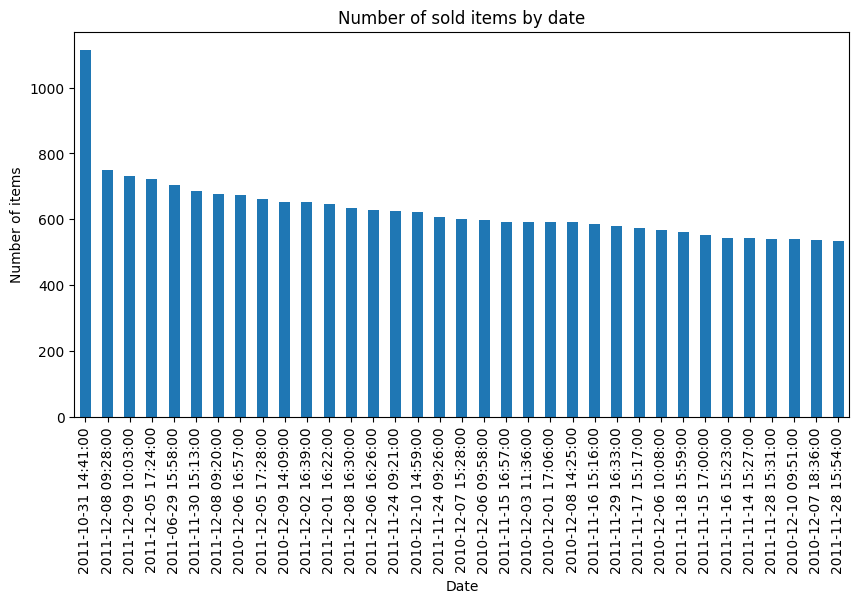

In [7]:
#1visualize the number of sold items by date using "Histogram".
df.InvoiceDate.value_counts().nlargest(35).plot(kind='bar', figsize=(10,5))
plt.title("Number of sold items by date")
plt.xlabel("Date")
plt.ylabel("Number of items")

From this histogram, we can understand that most of the sales took place on October 31st, 2011. Hence we can conclude that Halloween(which is celebrated on October 31st of every year) was an important sales day for the store in the year 2011.

<ipython-input-8-ff5ccb2cc3f0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="BrBG",annot=True)


<Axes: >

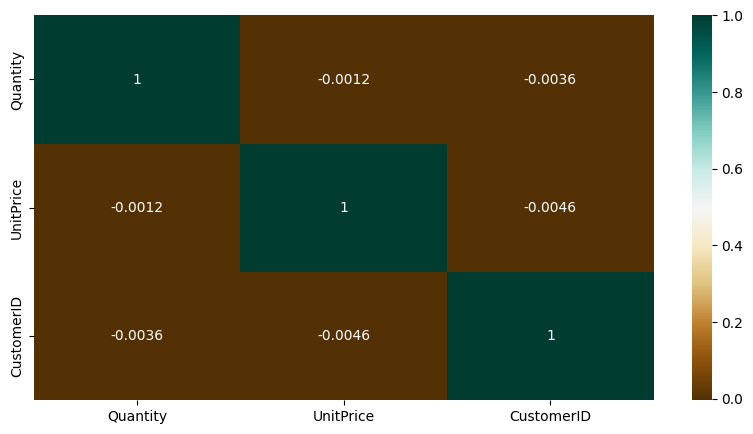

In [8]:
#2 visualize the correlation matrix for the data using a "Heatmap".
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

From this heatmap, we can understand the correlation matirx for the data. The color index shows the intensity of correlation in the matrix.


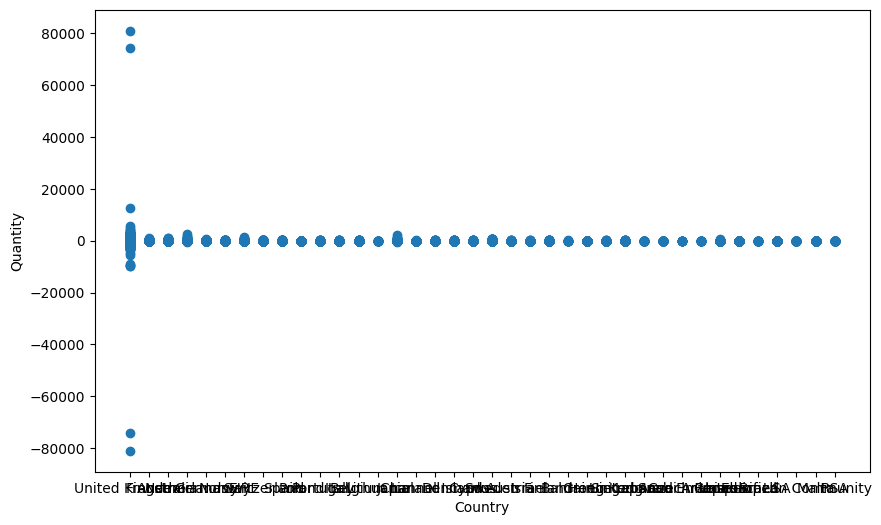

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Country'], df['Quantity'])
ax.set_xlabel('Country')
ax.set_ylabel('Quantity')
plt.show()

Here, using **matplotlib** library, a scatterplot is created which shows the quantity of products sold with respect to each country.

# Task 3 : Clean and Validate the Data

**1. Dealing with duplicate data**

The **.shape** attribute gives the rows, columns of the data.

In [10]:
df.shape

(541909, 8)

Now let us see how many duplicate rows are present in the dataset using the duplicated() method.

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("The number of duplicated rows are: ", duplicate_rows_df.shape)

The number of duplicated rows are:  (5268, 8)


We can use drop_duplicates() method to delete the duplicated rows.

In [12]:
df = df.drop_duplicates()
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df.shape

(536641, 8)

Now, as we can see, the shape matrix is now modified and it came down to 536,641 from 541909 after deleting 5268 duplicated rows.

**2. Dealing with missing data**

Using count() method, we can see the number of occurrences of each column.

In [14]:
df.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

Next, we will use .isnull() method to see how many nulls are present in the dataset column-wise.

In [15]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


Now, we will drop all the nulls using dropna() method.

In [16]:
df = df.dropna()
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

Now we can see that all the nulls are gone.

In [17]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In this way, we can do the data pre-processing using pandas, matplotlib, and seaborn libraries available in python. This is Exploratory Data Analysis used before any data analysis processes to avoid  nulls, outliers, and to understand the data more clearly.